In [67]:
import pandas as pd 
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit

In [68]:
#tracing the indicator id and the country names respect to the country codes
countries = ['China','Argentina','India','Russia','Japan','Germany','Korea',
            'Canada','Mexico','France']
             

country_code = ['CHN','CAN','IND','RUS','DEU','ARG','JPN','KOR',
               'MEX','FRA']
               

country_names = {'CHN':'China','CAN':'Canada','IND':'India','RUS':'Russia',
                 'DEU':'Germany','ARG':'Argentina','JPN':'Japan','KOR':'Korea',
                 'MEX':'Mexico','FRA':'France'}
                  

In [69]:
#taking the appropriate datsets
wb.series.info('EN.ATM.CO2E.KT')

id,value
EN.ATM.CO2E.KT,CO2 emissions (kt)
,1 elements


In [70]:
#dataset with data regarding the total CO2 emissions in kiloton from a period of year 2000-2010
data_CO2 = pd.DataFrame(wb.data.DataFrame('EN.ATM.CO2E.KT',country_code, time=range(2000, 2011)))
data_CO2

,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010
economy,,,,,,,,,,,
ARG,131910.0,124870.0,117470.0,128360.0,141850.0,146320.0,155370.0,163630.0,168150.0,157440.0,168140.0
CAN,515000.0,506940.0,525470.0,545360.0,537250.0,549970.0,541070.0,571310.0,550200.0,520800.0,535030.0
CHN,3344090.0,3526750.0,3808330.0,4413300.0,5121830.0,5819120.0,6431910.0,6988210.0,7195010.0,7715110.0,8470570.0
DEU,830080.0,847500.0,833180.0,836550.0,820830.0,802170.0,814160.0,783600.0,789550.0,734660.0,772920.0
FRA,373240.0,376860.0,371170.0,376840.0,377950.0,380820.0,371600.0,362910.0,358210.0,343880.0,347940.0
IND,940170.0,953880.0,987530.0,1015890.0,1087190.0,1137740.0,1214250.0,1336100.0,1423880.0,1568530.0,1665310.0
JPN,1182950.0,1170620.0,1206970.0,1215780.0,1211090.0,1213820.0,1190260.0,1226360.0,1159620.0,1101210.0,1156080.0
KOR,455690.0,470520.0,461940.0,464610.0,484900.0,480080.0,486940.0,501500.0,513190.0,525390.0,574260.0
MEX,384480.0,382760.0,388740.0,407000.0,414190.0,432390.0,449710.0,462410.0,477410.0,461760.0,468940.0


In [71]:
##dataset with data regarding the total population from a period of year 2000-2010
wb.series.info('SP.POP.TOTL')

id,value
SP.POP.TOTL,"Population, total"
,1 elements


In [72]:
data_Pop = pd.DataFrame(wb.data.DataFrame('SP.POP.TOTL',country_code, time=range(2000, 2011)))
data_Pop

,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010
economy,,,,,,,,,,,
ARG,3.687080e+07,3.727564e+07,3.768174e+07,3.808787e+07,3.849197e+07,3.889292e+07,3.928988e+07,3.968430e+07,4.008016e+07,4.048279e+07,4.078845e+07
CAN,3.068573e+07,3.102090e+07,3.136008e+07,3.164403e+07,3.194066e+07,3.224375e+07,3.257117e+07,3.288902e+07,3.324712e+07,3.362890e+07,3.400489e+07
CHN,1.262645e+09,1.271850e+09,1.280400e+09,1.288400e+09,1.296075e+09,1.303720e+09,1.311020e+09,1.317885e+09,1.324655e+09,1.331260e+09,1.337705e+09
DEU,8.221151e+07,8.234992e+07,8.248850e+07,8.253418e+07,8.251626e+07,8.246942e+07,8.237645e+07,8.226637e+07,8.211010e+07,8.190231e+07,8.177693e+07
FRA,6.091250e+07,6.135743e+07,6.180527e+07,6.224488e+07,6.270490e+07,6.317936e+07,6.362138e+07,6.401623e+07,6.437498e+07,6.470704e+07,6.502750e+07
IND,1.056576e+09,1.075000e+09,1.093317e+09,1.111523e+09,1.129623e+09,1.147610e+09,1.165486e+09,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09
JPN,1.268430e+08,1.271490e+08,1.274450e+08,1.277180e+08,1.277610e+08,1.277730e+08,1.278540e+08,1.280010e+08,1.280630e+08,1.280470e+08,1.280700e+08
KOR,4.700811e+07,4.737016e+07,4.764474e+07,4.789233e+07,4.808252e+07,4.818456e+07,4.843829e+07,4.868364e+07,4.905471e+07,4.930784e+07,4.955411e+07
MEX,9.889984e+07,1.002982e+08,1.016848e+08,1.030810e+08,1.045149e+08,1.060052e+08,1.075602e+08,1.091705e+08,1.108153e+08,1.124639e+08,1.140930e+08


In [73]:
#transposed data of the total population dataset
x = data_Pop.T
x

economy,ARG,CAN,CHN,DEU,FRA,IND,JPN,KOR,MEX,RUS
YR2000,36870796.0,30685730.0,1.262645e+09,82211508.0,60912500.0,1.056576e+09,126843000.0,47008111.0,98899845.0,146596869.0
YR2001,37275644.0,31020902.0,1.271850e+09,82349925.0,61357432.0,1.075000e+09,127149000.0,47370164.0,100298152.0,145976482.0
YR2002,37681743.0,31360079.0,1.280400e+09,82488495.0,61805266.0,1.093317e+09,127445000.0,47644736.0,101684764.0,145306497.0
YR2003,38087866.0,31644028.0,1.288400e+09,82534176.0,62244880.0,1.111523e+09,127718000.0,47892330.0,103081020.0,144648618.0
YR2004,38491970.0,31940655.0,1.296075e+09,82516260.0,62704901.0,1.129623e+09,127761000.0,48082519.0,104514934.0,144067316.0
YR2005,38892924.0,32243753.0,1.303720e+09,82469422.0,63179356.0,1.147610e+09,127773000.0,48184561.0,106005199.0,143518814.0
YR2006,39289876.0,32571174.0,1.311020e+09,82376451.0,63621376.0,1.165486e+09,127854000.0,48438292.0,107560155.0,143049637.0
YR2007,39684303.0,32889025.0,1.317885e+09,82266372.0,64016227.0,1.183209e+09,128001000.0,48683638.0,109170503.0,142805114.0
YR2008,40080159.0,33247118.0,1.324655e+09,82110097.0,64374979.0,1.200670e+09,128063000.0,49054708.0,110815272.0,142742366.0
YR2009,40482786.0,33628895.0,1.331260e+09,81902307.0,64707035.0,1.217726e+09,128047000.0,49307835.0,112463886.0,142785349.0


In [74]:
#pair plot comparing the two data
data_1 = pd.DataFrame()
CO2 = []
Population = []
for i in data_Pop:
    Population.extend(data_Pop[i])

for i in data_CO2:
    CO2.extend(data_CO2[i])

data_1['CO2'] = CO2
data_1['Population'] = Population

In [75]:
type(data_1)

pandas.core.frame.DataFrame

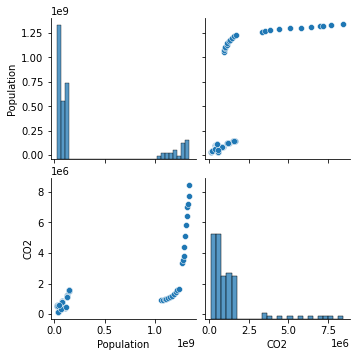

In [76]:
sns.pairplot(data_1[['Population','CO2']])

# K Means Clusttering

K means clusttering before normalisation is found out and plotted

In [77]:
'''function for finding K means clusttering'''
kmeans1 = KMeans(n_clusters=3, random_state=0).fit(data_1[['Population','CO2']])

In [78]:
kmeans1.inertia_

1.716129860313732e+17

In [79]:
kmeans1.cluster_centers_

array([[8.03487999e+07, 6.87773636e+05],
       [1.29058634e+09, 5.08215923e+06],
       [1.12922388e+09, 1.12184778e+06]])

In [80]:
data_1['cluster'] = kmeans1.labels_

In [81]:
'''cluster found out'''
data_1

,CO2,Population,cluster
0,131910.0,3.687080e+07,0
1,515000.0,3.068573e+07,0
2,3344090.0,1.262645e+09,1
3,830080.0,8.221151e+07,0
4,373240.0,6.091250e+07,0
...,...,...,...
105,1665310.0,1.234281e+09,1
106,1156080.0,1.280700e+08,0
107,574260.0,4.955411e+07,0
108,468940.0,1.140930e+08,0


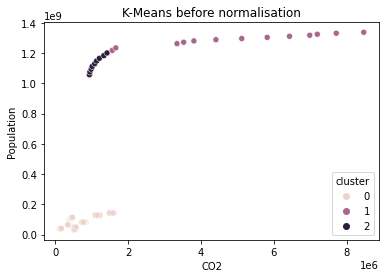

In [82]:
'''plot for K means clusttering before normalisation'''
sns.scatterplot(x = 'CO2', y = 'Population' , hue='cluster', data = data_1)
plt.title("K-Means before normalisation")
plt.show()

# K-means after normalisation

K means clusttering after normalisation is found out and plotted

In [83]:
from sklearn import preprocessing

In [84]:
data_x = data_1.drop(['cluster'], axis = 1)


In [85]:
'''function called for clusttering'''
names = ['CO2','Population']
a = preprocessing.normalize(data_x, axis=0)
data_aft = pd.DataFrame(a,columns=names)
data_aft

,CO2,Population
0,0.006110,0.006336
1,0.023855,0.005273
2,0.154902,0.216960
3,0.038450,0.014126
4,0.017289,0.010467
...,...,...
105,0.077139,0.212087
106,0.053551,0.022006
107,0.026600,0.008515
108,0.021722,0.019605


In [86]:
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(data_aft[['Population','CO2']])

In [87]:
kmeans2.inertia_

0.09896870211846528

In [88]:
kmeans2.cluster_centers_

array([[0.01380634, 0.03185847],
       [0.20165384, 0.07943959],
       [0.22575721, 0.30198533]])

In [89]:
data_aft['cluster'] = kmeans2.labels_

In [90]:
'''cluster shown along the data'''
data_aft

,CO2,Population,cluster
0,0.006110,0.006336,0
1,0.023855,0.005273,0
2,0.154902,0.216960,1
3,0.038450,0.014126,0
4,0.017289,0.010467,0
...,...,...,...
105,0.077139,0.212087,1
106,0.053551,0.022006,0
107,0.026600,0.008515,0
108,0.021722,0.019605,0


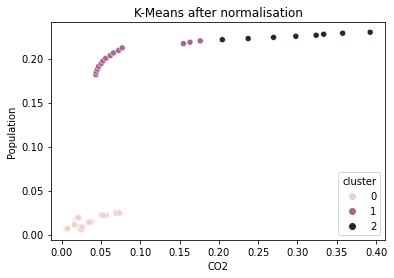

In [91]:
'''plot for K means clusttering after normalisation'''
sns.scatterplot(x = 'CO2', y = 'Population' , hue='cluster', data = data_aft)
plt.title("K-Means after normalisation")
plt.show()

# Curve fitting

In [92]:
'''function to calculate the error limits'''
def func(x,a,b,c):
    return a * np.exp(-(x-b)**2 / c)


def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """
    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper

Here we are using the datasets regrading total access to electricity and the total energy consumption

In [93]:
#dataset containing data regarding total electricity access
data_acs = wb.data.DataFrame('EG.ELC.ACCS.ZS',country_code, time=range(2000, 2011))
data_acs

,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010
economy,,,,,,,,,,,
ARG,95.783287,95.511063,96.228867,96.442635,96.653503,96.863846,97.076057,97.292793,97.516754,97.750656,98.820000
CAN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
CHN,97.021797,97.272789,97.516205,97.754379,97.989670,98.224426,98.461052,98.702202,98.950577,99.208900,99.699997
DEU,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
FRA,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
IND,58.721474,55.799999,62.299999,64.047485,64.400002,67.579811,67.900002,71.119865,72.899384,75.000000,76.300003
JPN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
KOR,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
MEX,98.007133,97.138321,97.897087,97.400856,98.597702,98.932732,99.114159,97.910568,98.914040,98.198212,99.236694


In [94]:
#dataset containing data regarding total energy consumption
data_con = wb.data.DataFrame('EG.USE.ELEC.KH.PC',country_code, time=range(2000, 2011))
data_con

,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010
economy,,,,,,,,,,,
ARG,2088.807630,2120.580398,2014.476878,2180.326931,2293.309488,2408.432958,2374.097592,2455.656081,2772.843291,2730.123367,2877.652653
CAN,17037.072281,16840.193751,16960.639672,17208.523517,17264.736744,16948.275221,16508.339552,16683.133659,16377.479696,15450.730689,15269.745477
CHN,992.943385,1076.549121,1194.856295,1379.484632,1585.838782,1782.312153,2039.014660,2325.926769,2446.369055,2612.456620,2943.589954
DEU,6635.421406,6762.653396,6900.780527,7009.726492,7108.962524,7138.221485,7212.437448,7229.089913,7187.764009,6817.158398,7264.322591
FRA,7224.526985,7342.256436,7299.248579,7529.551025,7661.490447,7652.863698,7540.295890,7513.579330,7643.451037,7338.042919,7734.727021
IND,393.646248,393.810198,410.644784,430.483163,451.611546,468.025754,509.214055,541.738395,561.247581,598.498242,640.394607
JPN,8299.409506,8162.014644,8266.099102,8164.933682,8393.257723,8539.010589,8542.478139,8710.025703,8270.007731,8020.273806,8594.909034
KOR,5906.959333,6309.203405,6673.937704,6977.317662,7390.794147,7796.314674,8039.796283,8462.206543,8772.287463,8877.574933,9716.126081
MEX,1800.467938,1834.151441,1843.963566,2001.018228,1927.073886,1996.392649,2020.952833,2047.531099,2046.694430,1995.298295,2018.827437


In [95]:
data_ele = pd.DataFrame()
access = []
consumption = []
for i in data_con:
    consumption.extend(data_acs[i])

for i in data_acs:
    access.extend(data_con[i])

data_ele['consumption'] = consumption
data_ele['access'] = access

In [96]:
data_ele

,consumption,access
0,95.783287,2088.807630
1,100.000000,17037.072281
2,97.021797,992.943385
3,100.000000,6635.421406
4,100.000000,7224.526985
...,...,...
105,76.300003,640.394607
106,100.000000,8594.909034
107,100.000000,9716.126081
108,99.236694,2018.827437


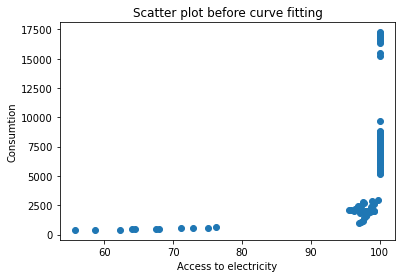

In [97]:
'''plot for scattering'''
plt.scatter(data_ele['consumption'],data_ele['access'])
plt.title('Scatter plot before curve fitting')
plt.ylabel('Consumtion')
plt.xlabel('Access to electricity')
plt.show()

In [98]:
'''adding an exponential function'''
def expoFunc(x,a,b):
    return a**(x+b)

In [99]:
x_data = data_ele['consumption']
y_data = data_ele['access']
popt, pcov = curve_fit(expoFunc,x_data,y_data,p0=[1,0])

In [100]:
popt

array([  2.5290727 , -90.21661065])

In [101]:
pcov

array([[ 0.26280419, -1.09247582],
       [-1.09247582,  4.54332363]])

In [102]:
a_opt, b_opt = popt
x_mod = np.linspace(min(x_data),max(x_data),100)
y_mod = expoFunc(x_mod,a_opt,b_opt)

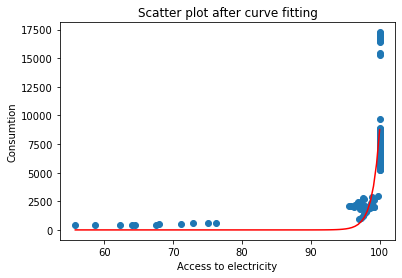

In [103]:
'''plot for scattering after fitting the curve'''
plt.scatter(x_data,y_data)
plt.plot(x_mod,y_mod,color = 'r')
plt.title('Scatter plot after curve fitting')
plt.ylabel('Consumtion')
plt.xlabel('Access to electricity')
plt.savefig("curvefit_after.png")
plt.show()